# **Week 5: Cohort and Segment Analysis**

In [ ]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Read the CSV
df = pd.read_csv("Kids_ScreenTime_Cleaned.csv")

# Preview
df.head()

Saving Kids_ScreenTime_Cleaned.csv to Kids_ScreenTime_Cleaned.csv


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Group,Health_Category,Device_Type,Screen_Time_Category
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Pre-Teen (11-14),Physical,Portable,Moderate
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Pre-Teen (11-14),NaN,Portable,High
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Teenager (15-18),NaN,Large Screen,Moderate
3,15,Female,1.21,Laptop,False,0.39,No Reported Issues,Urban,Teenager (15-18),NaN,Portable,Low
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-Teen (11-14),Mental,Portable,High


In [ ]:

cohort_gender_device = (
    df.groupby(['Gender', 'Primary_Device'])['Avg_Daily_Screen_Time_hr']
      .mean()
      .reset_index()
      .sort_values(by='Avg_Daily_Screen_Time_hr', ascending=False)
)

print("Top 5 Gender vs Primary Device Cohorts by Average Screen Time:")
display(cohort_gender_device.head(5))

Top 5 Gender vs Primary Device Cohorts by Average Screen Time:


,Gender,Primary_Device,Avg_Daily_Screen_Time_hr
0,Female,Laptop,4.480541
5,Male,Smartphone,4.450932
4,Male,Laptop,4.435549
1,Female,Smartphone,4.366820
6,Male,TV,4.302387


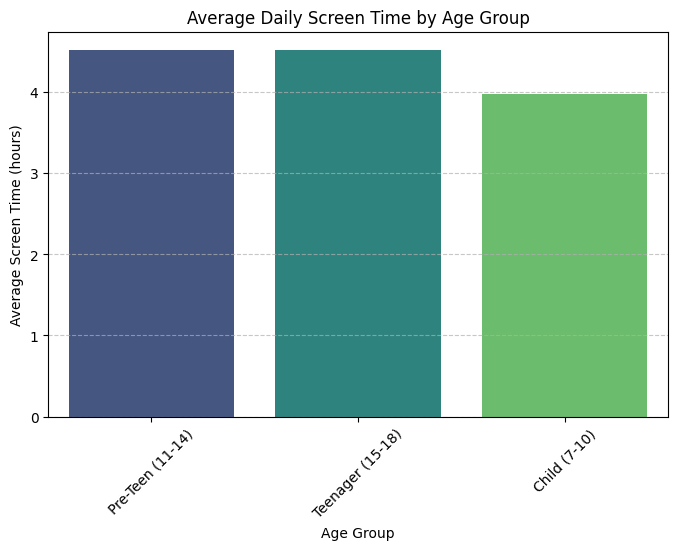

In [ ]:
# Chart 1: Average Screen Time by Age Group

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Age_Group', y='Avg_Daily_Screen_Time_hr',
            hue='Age_Group', palette='viridis', errorbar=None, legend=False)
plt.title('Average Daily Screen Time by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Screen Time (hours)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Summary

Groups children by Age_Group.
Calculates mean daily screen time for each group.
Visualizes differences to identify which group is most active.

/tmp/ipython-input-3117889004.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', palette='coolwarm')


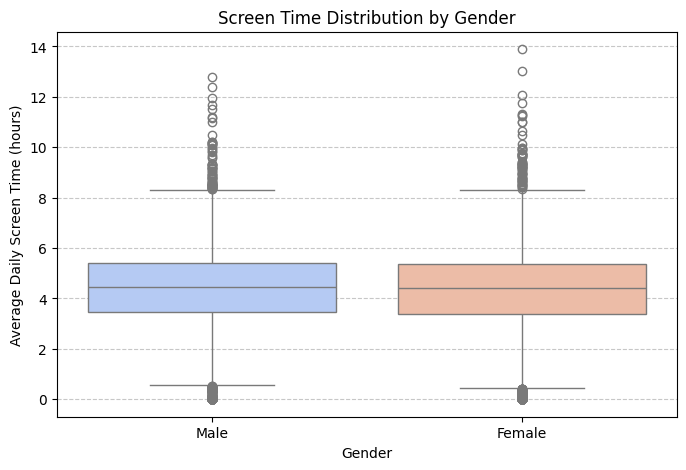

In [ ]:
# Chart 2: Screen Time Distribution by Gender

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', palette='coolwarm')
plt.title('Screen Time Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Daily Screen Time (hours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Summary

Uses a boxplot to show spread, median, and outliers of screen time across genders.

Reveals whether one gender tends to have higher or more variable screen time.

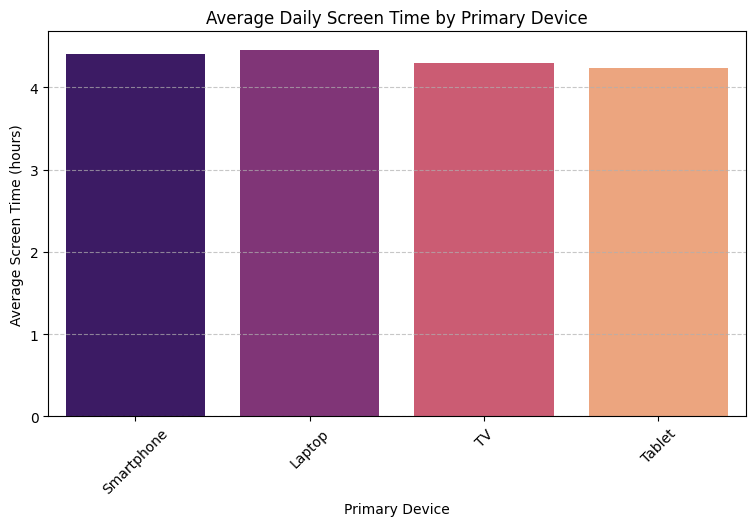

In [ ]:
# Chart 3: Average Screen Time by Primary Device

plt.figure(figsize=(9,5))
sns.barplot(data=df, x='Primary_Device', y='Avg_Daily_Screen_Time_hr',
            hue='Primary_Device', palette='magma', errorbar=None, legend=False)
plt.title('Average Daily Screen Time by Primary Device')
plt.xlabel('Primary Device')
plt.ylabel('Average Screen Time (hours)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Summary

Groups kids by Primary_Device.
Computes the average daily screen time per device category.
Displays which devices contribute most to screen exposure.

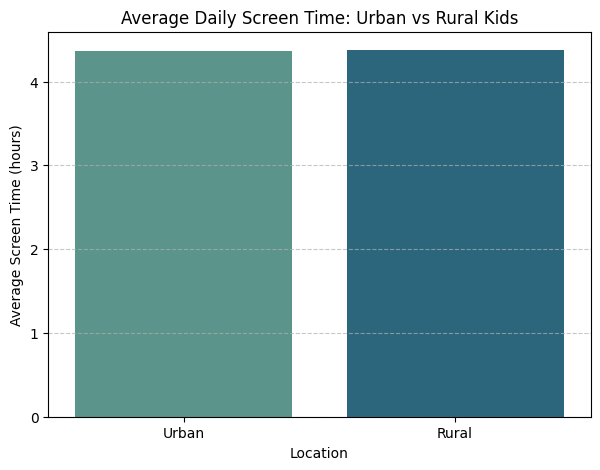

In [ ]:
# Chart 4: Average Screen Time by Urban or Rural

plt.figure(figsize=(7,5))
sns.barplot(data=df, x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr',
            hue='Urban_or_Rural', palette='crest', errorbar=None, legend=False)
plt.title('Average Daily Screen Time: Urban vs Rural Kids')
plt.xlabel('Location')
plt.ylabel('Average Screen Time (hours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Summary

Compares mean Avg_Daily_Screen_Time_hr between Urban and Rural kids.
Useful for identifying demographic disparities in digital habits.

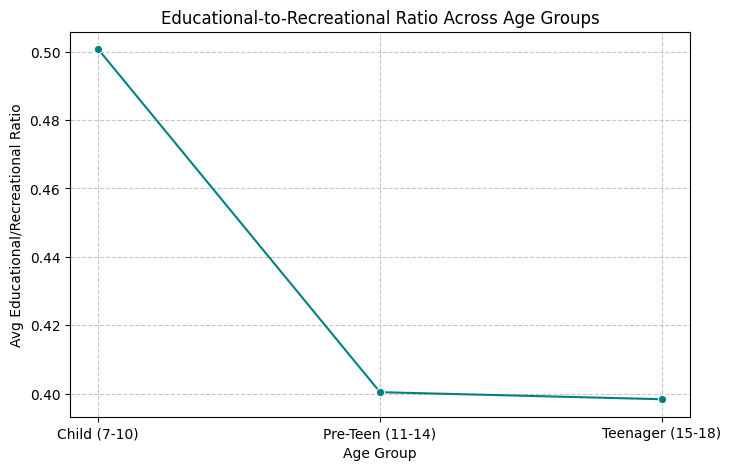

In [ ]:
# Chart 5: Educational vs Recreational Ratio by Age Group (Line Chart)

age_group_ratio = df.groupby('Age_Group')['Educational_to_Recreational_Ratio'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=age_group_ratio, x='Age_Group', y='Educational_to_Recreational_Ratio', marker='o', color='teal')
plt.title('Educational-to-Recreational Ratio Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Avg Educational/Recreational Ratio')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Summary

Aggregates mean Educational-to-Recreational ratio by Age_Group.
The line plot shows trends — e.g., a downward slope indicates more entertainment as age increases.

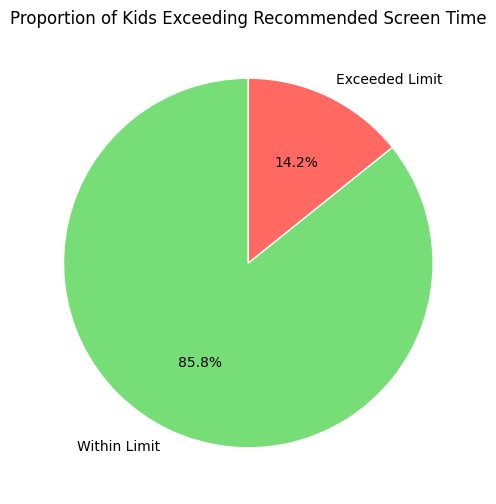

In [ ]:
# Chart 6: Kids Exceeding Recommended Screen Time (Pie Chart)

limit_counts = df['Exceeded_Recommended_Limit'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(limit_counts, labels=['Within Limit', 'Exceeded Limit'] if True in limit_counts.index else ['Exceeded Limit', 'Within Limit'],
        autopct='%1.1f%%', startangle=90, colors=['#77dd77','#ff6961'], wedgeprops={'edgecolor': 'white'})
plt.title('Proportion of Kids Exceeding Recommended Screen Time')
plt.show()


Summary

Counts how many kids exceed vs stay within the safe screen-time limit.

The pie chart clearly shows the percentage distribution.

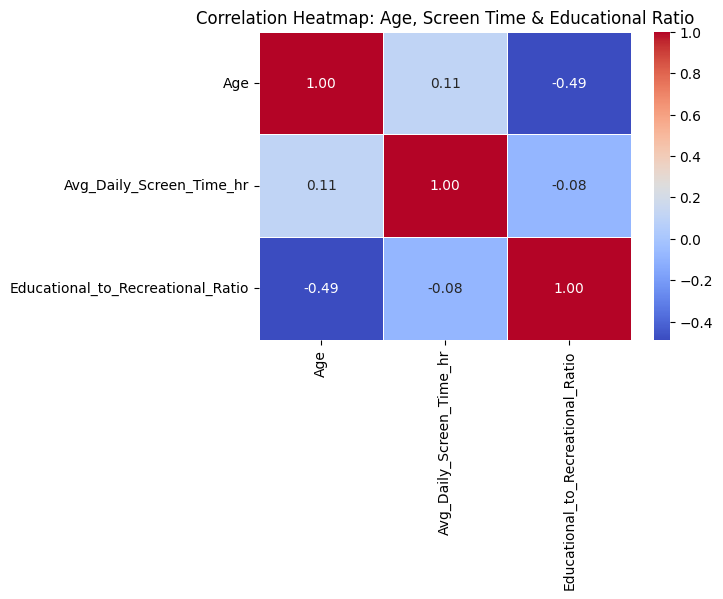

In [ ]:
# Chart 7: Correlation Heatmap

plt.figure(figsize=(6,4))
numeric_df = df[['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']]
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Age, Screen Time & Educational Ratio')
plt.show()


Summary

Calculates pairwise correlations between numeric columns.

The heatmap color and numbers show whether variables move together (+ve) or oppositely (–ve).